In [2]:
import tensorflow as tf
from tensorflow import keras


In [18]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [5]:
print(fashion_mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [19]:
(train_imgs, train_labels),(test_imgs,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
train_imgs.shape

(60000, 28, 28)

In [22]:
len(train_labels)

60000

In [23]:
test_imgs.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [24]:
import numpy as np
import matplotlib.pyplot as plt

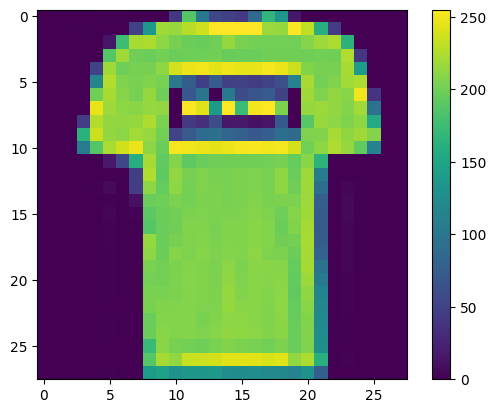

In [25]:
plt.figure()
plt.imshow(train_imgs[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
train_images=train_imgs/255.0
test_images=test_imgs/255.0

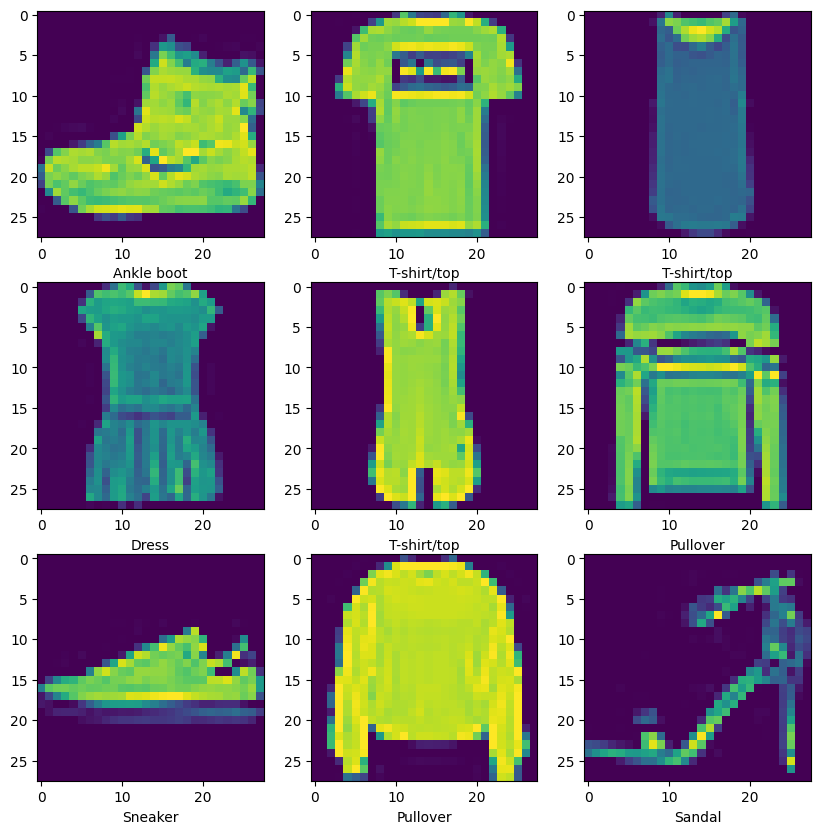

In [30]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])

plt.show()



In [33]:
from keras.layers import activation
from keras.activations import activation_layers
model=keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - accuracy: 0.8655
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3366 - accuracy: 0.8775
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3134 - accuracy: 0.8860
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.8907
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8971
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.9010
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2565 - accuracy: 0.9044
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2467 - accuracy: 0.9082
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2409 - accuracy: 0.9101
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.231

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3696 - accuracy: 0.8827 - 464ms/epoch - 1ms/step


In [39]:
print("test accuracy is ", test_acc)
print("test loss is ", test_loss)

test accuracy is  0.8827000260353088
test loss is  0.3696366548538208


In [40]:
predictions=model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [43]:
pred100=predictions[100]

In [44]:
pred100=np.argmax(pred100)

In [48]:
print("true label of testimage of number 100  ",class_names[test_labels[100]],"and prediction label is", class_names[test_labels[100]])

true label of testimage of number 100   Dress and prediction label is Dress
